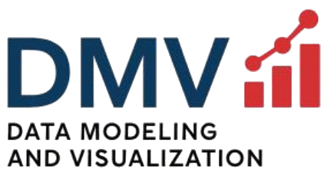

# **GeoSpatial Plots**

Data visualizations on the geographical map often gives better clarity.

Let's install the necessary libraries.

In [18]:
!pip install geopandas
!pip install folium
!pip install plotly
!pip install contextily
!pip install pyproj
!pip install shapely
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install cartopy


# **We need Shape files for GeoSpatial plots**

Source: [Natural Earth](https://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/)

In [19]:
# For using files stored in Google Drive
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive', force_remount=True)
# Now include the file path
folder_path = 'drive/MyDrive/DA209_DMV/ne_countries/'
world_map = 'ne_110m_admin_0_countries.shp'

Mounted at /content/drive


## **Let's remove Antarctica for better visualization**

In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # For creating custom legend patches
import pandas as pd

# Load world geometry
world = gpd.read_file(folder_path + world_map)

# Drop Antarctica for better map clarity
world = world[world['ADMIN'] != 'Antarctica']

print(world.columns)

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


# **1. Choropleth Map (World Population)**

Dataset: Natural Earth countries + population

Goal: Show population distribution by country

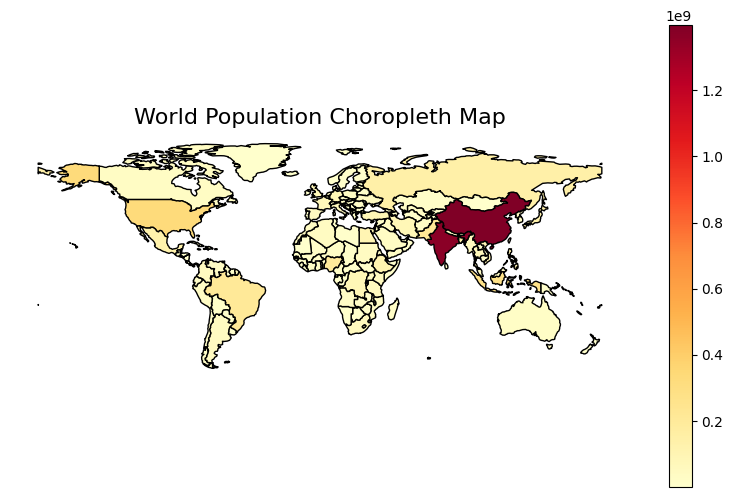

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
world.plot(column='POP_EST', ax=ax, legend=True,
           cmap='YlOrRd', edgecolor='black')
ax.set_title("World Population Choropleth Map", fontsize=16)
plt.axis('off')
plt.show()


# **2. Dot/Point Map (Earthquakes)**

Dataset: [USGS Earthquake data](https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/significant_month.csv)

Goal: Plot locations of earthquakes as dots

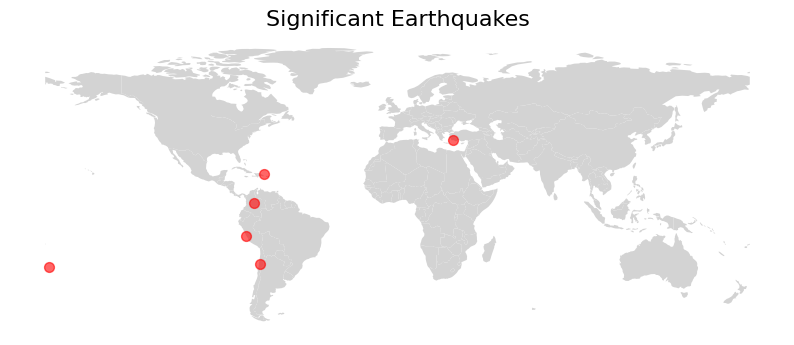

In [5]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Sample earthquake data
earthquake_file = 'geospatial_earthquake.csv'
df = pd.read_csv(folder_path + earthquake_file)

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326")


# Load world geometry
world = gpd.read_file(folder_path + world_map)
# Drop Antarctica for better map clarity
world = world[world['ADMIN'] != 'Antarctica']

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
world.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, color='red', markersize=50, alpha=0.6)
ax.set_title("Significant Earthquakes", fontsize=16)
plt.axis('off')
plt.show()


# **3. Proportional Symbol Map: COVID Cases**

/tmp/ipython-input-6-2352077117.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  covid_data['centroid'] = covid_data.geometry.centroid


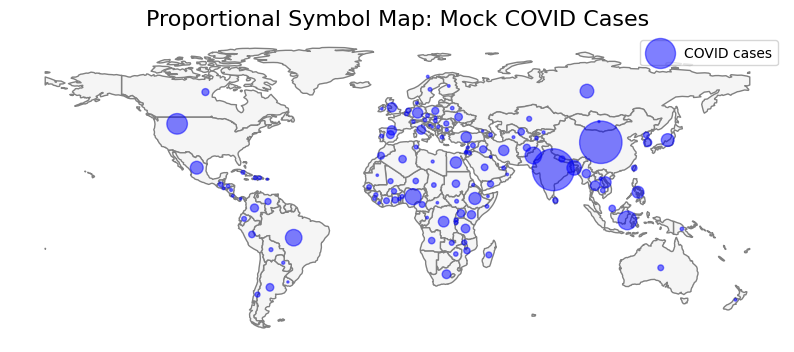

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt


# Load world geometry
world = gpd.read_file(folder_path + world_map)
# Drop Antarctica for better map clarity
world = world[world['ADMIN'] != 'Antarctica']

# Create mock case counts proportional to population
world['cases'] = world['POP_EST'] // 3000
covid_data = world[world['cases'] > 1000].copy()

# Compute centroids
covid_data['centroid'] = covid_data.geometry.centroid
covid_data = covid_data.set_geometry('centroid')

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
world.plot(ax=ax, color='whitesmoke', edgecolor='grey')
covid_data.plot(
    ax=ax, markersize=covid_data['cases'] / 500,
    color='blue', alpha=0.5, label='COVID cases')
ax.set_title("Proportional Symbol Map: Mock COVID Cases", fontsize=16)
plt.axis('off')
plt.legend()
plt.show()


# **4. Flow Map (US) City-to-City Migration (Mock Data)**

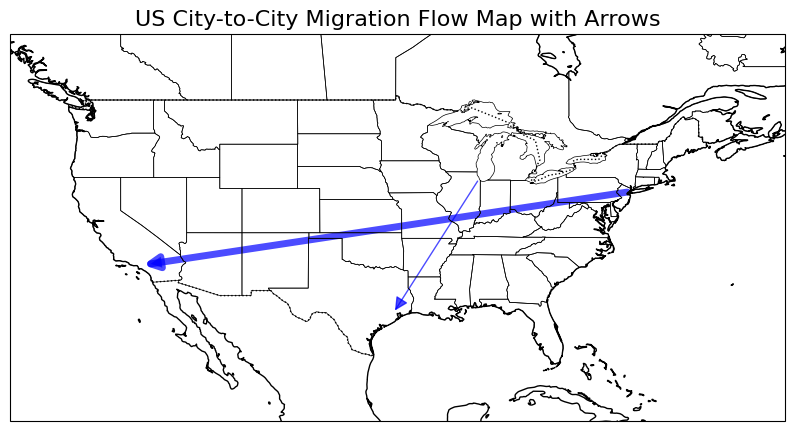

In [22]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import FancyArrowPatch

# Define migration flows with coordinates
flows = [
    {'from': (-74.006, 40.7128), 'to': (-118.2437, 34.0522), 'migrants': 100000},  # NYC to LA
    {'from': (-87.6298, 41.8781), 'to': (-95.3698, 29.7604), 'migrants': 20000},   # Chicago to Houston
]

# Setup map
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-130, -60, 20, 55], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Draw flow arrows
for flow in flows:
    start_lon, start_lat = flow['from']
    end_lon, end_lat = flow['to']
    linewidth = flow['migrants'] / 20000

    # Create arrow patch
    arrow = FancyArrowPatch(
        (start_lon, start_lat), (end_lon, end_lat),
        transform=ccrs.PlateCarree()._as_mpl_transform(ax),
        arrowstyle='-|>',  # arrowhead style
        color='blue',
        linewidth=linewidth,
        alpha=0.7,
        mutation_scale=20  # size of the arrow head
    )
    ax.add_patch(arrow)

# Title and show
plt.title("US City-to-City Migration Flow Map with Arrows", fontsize=16)
plt.show()


# **How to deal with Country or States specifically?**

Let's download the shape files from [GADM](https://gadm.org/download_country.html)

In [23]:
# For using files stored in Google Drive
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive', force_remount=True)
# Now include the file path
folder_path = 'drive/MyDrive/DA209_DMV/south_asia/'
# --- Configuration ---
INDIA_SHAPEFILE_PATH = 'gadm41_IND_shp/gadm41_IND_0.shp' # Level 0 for country boundary
PAKISTAN_SHAPEFILE_PATH = 'gadm41_PAK_shp/gadm41_PAK_0.shp' # Level 0 for country boundary
NEPAL_SHAPEFILE_PATH = 'gadm41_NPL_shp/gadm41_NPL_0.shp' # Level 0 for country boundary
BHUTAN_SHAPEFILE_PATH = 'gadm41_BTN_shp/gadm41_BTN_0.shp' # Level 0 for country boundary
SRILANKA_SHAPEFILE_PATH = 'gadm41_LKA_shp/gadm41_LKA_0.shp' # Level 0 for country boundary

Mounted at /content/drive


### **Let's load the GeoSpatial data**

In [24]:
# --- Load Geospatial Data ---
try:
    gdf_india = gpd.read_file(folder_path+INDIA_SHAPEFILE_PATH)
    gdf_pakistan = gpd.read_file(folder_path+PAKISTAN_SHAPEFILE_PATH)
    gdf_nepal = gpd.read_file(folder_path+NEPAL_SHAPEFILE_PATH)
    gdf_bhutan = gpd.read_file(folder_path+BHUTAN_SHAPEFILE_PATH)
    gdf_srilanka = gpd.read_file(folder_path+SRILANKA_SHAPEFILE_PATH)
except FileNotFoundError:
    print("Error: Shapefiles not found. Please check the paths and ensure files are in the correct directory structure (e.g., 'gadm41_IND_shp/gadm41_IND_1.shp').")
    print("Download shapefiles from GADM (https://gadm.org/data.html) for India (level 0 or 1) and others (level 0).")
    exit()


# **Let's plot some countries in South Asia**

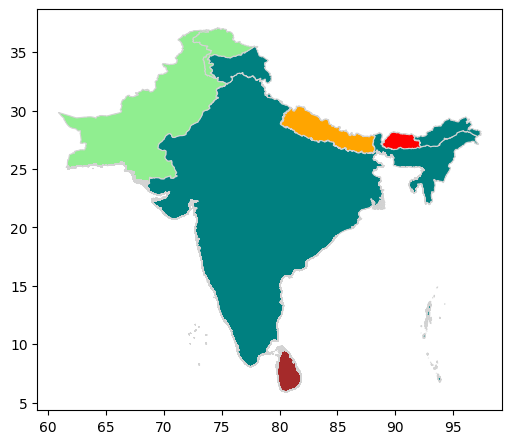

In [25]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # For creating custom legend patches
import pandas as pd

# --- Plotting ---
fig, ax = plt.subplots(1, 1, figsize=(6, 6))


# Plot India
gdf_india.plot(ax=ax, color='teal', edgecolor='lightgrey', linewidth=.8)

# Plot Pakistan
gdf_pakistan.plot(ax=ax, color='lightgreen', edgecolor='lightgrey', linewidth=.8)

# Plot Nepal
gdf_nepal.plot(ax=ax, color='orange', edgecolor='lightgrey', linewidth=.8)

# Plot Bhutan
gdf_bhutan.plot(ax=ax, color='red', edgecolor='lightgrey', linewidth=.8)

# Plot Sri Lanka
gdf_srilanka.plot(ax=ax, color='brown', edgecolor='lightgrey', linewidth=.8)

# Show the plot
plt.show()

# **What if we need to plot States?**

In [27]:
INDIA_STATE_SHAPEFILE_PATH = 'gadm41_IND_shp/gadm41_IND_1.shp' # Level 1 for states

# --- Load Geospatial Data ---
gdf_india_states = gpd.read_file(folder_path+INDIA_STATE_SHAPEFILE_PATH)

# **Let's give color to the states**

In [40]:
india_state_colors = {
    'Andhra Pradesh': 'orange',
    'Andaman and Nicobar': 'lightgreen',
    'Assam': 'cyan',
    'Gujarat': 'yellow',
    'Tamil Nadu': 'red',
    'West Bengal': 'lightcoral',
    'NCT of Delhi':'green',
}

In [41]:
# --- Process India Data for Coloring ---
# Apply colors to Indian states
gdf_india_states['color'] = 'white' # Default color for states not explicitly listed
for state_name, color_val in india_state_colors.items():
    if state_name in gdf_india_states['NAME_1'].values:
        gdf_india_states.loc[gdf_india_states['NAME_1'] == state_name, 'color'] = color_val

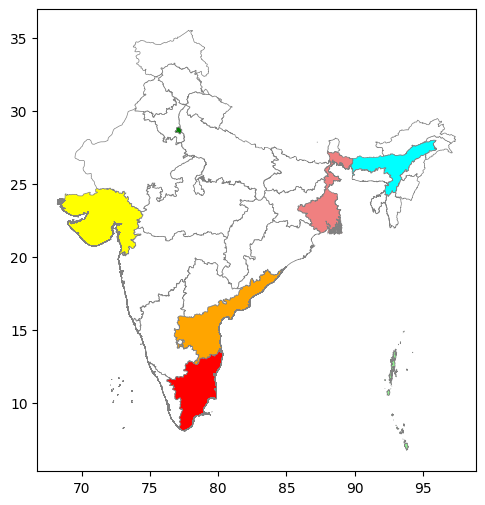

In [42]:
# --- Plotting ---
fig, ax = plt.subplots(1, 1, figsize=(6, 6)) # Increased figure size for better readability and legend placement

# Plot Indian states with their colors.
gdf_india_states.plot(ax=ax, color=gdf_india_states['color'], edgecolor='grey', linewidth=0.5)

# Show the plot
plt.show()

# **What if, we need to plot both the countries and states together?**

In [43]:
india_state_colors = {
    'Jammu and Kashmir': 'lightcoral',
    'Tamil Nadu': 'red',
    'Bihar': 'limegreen',
    'Chhattisgarh': 'limegreen',
    'NCT of Delhi': 'limegreen',
    'Haryana': 'limegreen',
    'Himachal Pradesh': 'limegreen',
    'Jharkhand': 'limegreen',
    'Madhya Pradesh': 'limegreen',
    'Rajasthan': 'limegreen',
    'Uttar Pradesh': 'brown',
    'Uttarakhand': 'limegreen',
    'Telangana': 'lightcoral',

}

# Apply colors to Indian states
gdf_india_states['color'] = 'white' # Default color for states not explicitly listed
for state_name, color_val in india_state_colors.items():
    if state_name in gdf_india_states['NAME_1'].values:
        gdf_india_states.loc[gdf_india_states['NAME_1'] == state_name, 'color'] = color_val

In [44]:
# --- Create Custom Legend ---
legend_elements = [
    mpatches.Patch(facecolor='limegreen', label='Hindi', edgecolor='black', linewidth=0.5),
    mpatches.Patch(facecolor='lightcoral', label='Urdu', edgecolor='black', linewidth=0.5),
    mpatches.Patch(facecolor='red', label='Tamil', edgecolor='black', linewidth=0.5),
    mpatches.Patch(facecolor='brown', label='Urdu & Hindi', edgecolor='black', linewidth=0.5),
    mpatches.Patch(facecolor='cyan', label='Hindi (widely spoken)', edgecolor='black', linewidth=0.5),
]

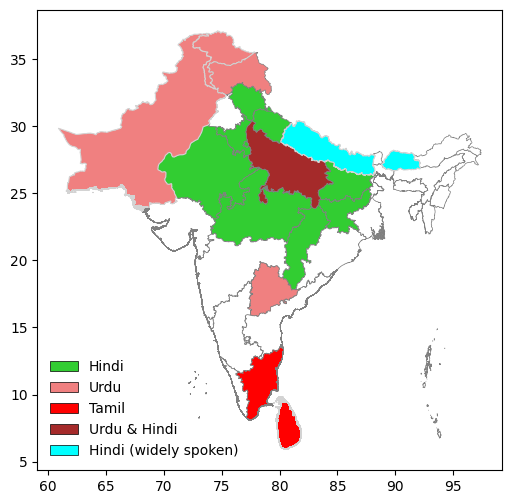

In [48]:
# --- Plotting ---
fig, ax = plt.subplots(1, 1, figsize=(6, 6)) # Increased figure size for better readability and legend placement

# Position the legend
ax.legend(handles=legend_elements, loc='lower left', frameon=False, fancybox=False, shadow=False, ncol=1, fontsize=10)

# Plot Indian states with their colors.
gdf_india_states.plot(ax=ax, color=gdf_india_states['color'], edgecolor='grey', linewidth=0.5)

# Plot Nepal
gdf_nepal.plot(ax=ax, color='cyan', edgecolor='lightgrey', linewidth=.8)

# Plot Bhutn
gdf_bhutan.plot(ax=ax, color='cyan', edgecolor='lightgrey', linewidth=.8)

# Plot Sri Lanka
gdf_srilanka.plot(ax=ax, color='red', edgecolor='lightgrey', linewidth=.8)

# Plot Pakistan
gdf_pakistan.plot(ax=ax, color='lightcoral', edgecolor='lightgrey', linewidth=.8)

# Show the plot
plt.show()

*Created by [Prachuryya Kaushik](https://www.iitg.ac.in/cse/student-pages/k.prachuryya) under the guidance of [Prof. Ashish Anand](https://www.iitg.ac.in/anand.ashish//)*